<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-11-28 10:18:56.285576: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 10:18:56.319992: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 10:18:56.320019: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 10:18:56.320951: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-28 10:18:56.326204: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 10:18:56.326564: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

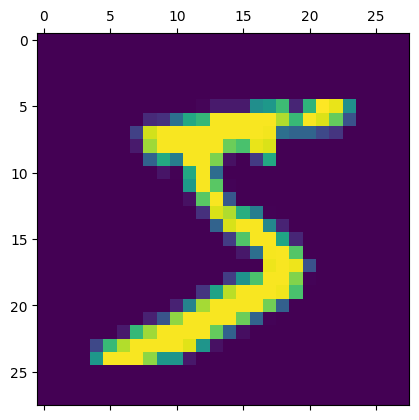

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

2023-11-28 10:18:58.777858: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-28 10:18:58.783954: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-11-28 10:18:58.983045: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 1s 609us/step - loss: 0.4659 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 1s 606us/step - loss: 0.3030 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 2s 802us/step - loss: 0.2830 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 2s 817us/step - loss: 0.2665 - accuracy: 0.9257


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 582us/step - loss: 0.2689 - accuracy: 0.9232


[0.26890602707862854, 0.9232000112533569]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 562us/step


array([2.5564626e-02, 3.3522952e-07, 6.9565073e-02, 9.5429581e-01,
       1.6647460e-03, 1.8384719e-01, 1.0939457e-06, 9.9980748e-01,
       1.0332691e-01, 7.6733595e-01], dtype=float32)

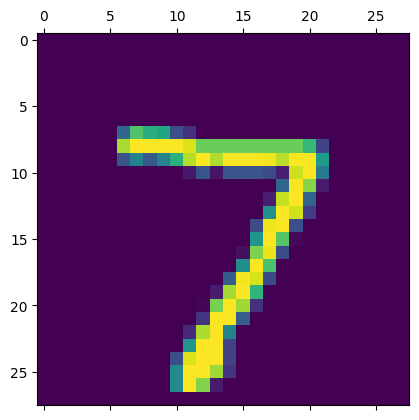

In [17]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    5,    3,    1,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   3,    9,  926,   16,    8,    6,   12,   11,   36,    5],
       [   3,    0,   21,  909,    0,   38,    2,   11,   12,   14],
       [   1,    1,    4,    1,  903,    0,   10,    4,    5,   53],
       [   7,    2,    5,   19,    8,  804,   11,    5,   22,    9],
       [  12,    3,    8,    1,    7,   22,  902,    2,    1,    0],
       [   1,    5,   24,    2,    6,    0,    0,  949,    2,   39],
       [   8,   10,    7,   27,    9,   47,    8,   13,  822,   23],
       [   9,    7,    2,   10,   16,    7,    0,   19,    1,  938]],
      dtype=int32)>

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Text(95.72222222222221, 0.5, 'Truth')

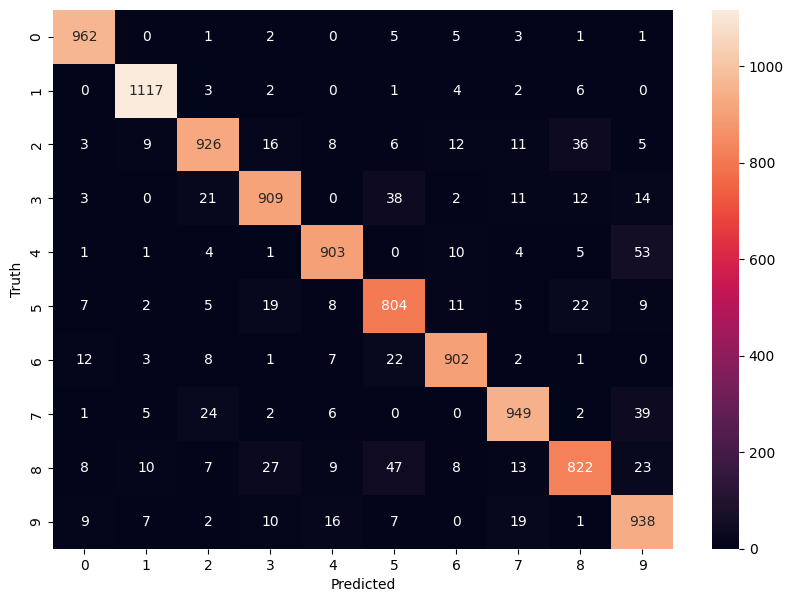

In [22]:
%pip install seaborn
# Note: 
# Below command install seaborn insisde the base environment. It does not work for kernel
# !pip install seabron 
# use "%pip install seabron". It work for jupuyter notebook kenrne
# %pip install seaborn
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


2023-11-28 10:19:10.722922: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.2696 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1204 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0853 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0653 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0519 - accuracy: 0.9847


313/313 [==============================] - 0s 890us/step


Text(95.72222222222221, 0.5, 'Truth')

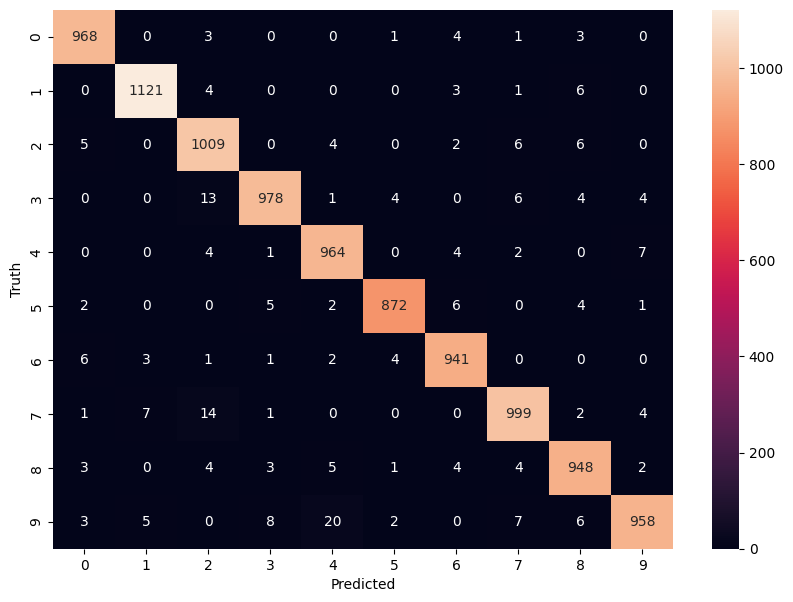

In [24]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 760us/step - loss: 0.0834 - accuracy: 0.9758


[0.08341040462255478, 0.9757999777793884]

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10


2023-11-28 10:19:24.216223: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.9199
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1260 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0884 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0685 - accuracy: 0.9785
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0538 - accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0428 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0361 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0286 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0245 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0195 - accurac

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 796us/step - loss: 0.0884 - accuracy: 0.9773


[0.08837293088436127, 0.9772999882698059]